# Import packages

In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
%matplotlib inline

# Read, clean and split data

In [3]:
data = pd.read_csv('GameData_25april.csv')
x = data.values
data = pd.DataFrame(x)
train, test = train_test_split(data, test_size=0.2)
x_train = train.loc[:,0:13]
y_train = train.loc[:,14]
x_test = test.loc[:,0:13]
y_test = test.loc[:,14]
sum(y_train==1)

948

In [4]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,480.0,0.0,0.0,106.0,12.0,19.0,0.63,5.0,1.0,0.175,23.1,0.0,0.0,0.0,0.0
1,480.0,0.0,0.0,106.0,19.0,20.0,0.95,5.0,0.0,0.212,24.1,0.0,1.0,1.0,0.0
2,480.0,0.0,0.0,106.0,12.0,23.0,0.52,6.0,2.0,0.140,14.0,1.0,2.0,2.0,0.0
3,480.0,0.0,0.0,106.0,15.0,17.0,0.88,6.0,2.0,0.187,17.6,1.0,3.0,3.0,0.0
4,480.0,0.0,0.0,250.0,18.0,15.0,1.20,9.0,0.0,0.170,20.6,0.0,0.0,0.0,1.0


# Classification Algorithms

## Decision Tree

In [5]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred)

In [6]:
acc

0.949685534591195

In [7]:
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Graph Vizualization 

In [8]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'

In [9]:
feature_names=["Duration(s)","Mode","Map","Score","Kills","Deaths","Kills/Deaths","Assists","Headshots","Accuracy(%)","Avg. Kill Dist.","Favorite Weapon","Favorite Rig","Favorite Trait"]
class_name=["Loss","Win"]

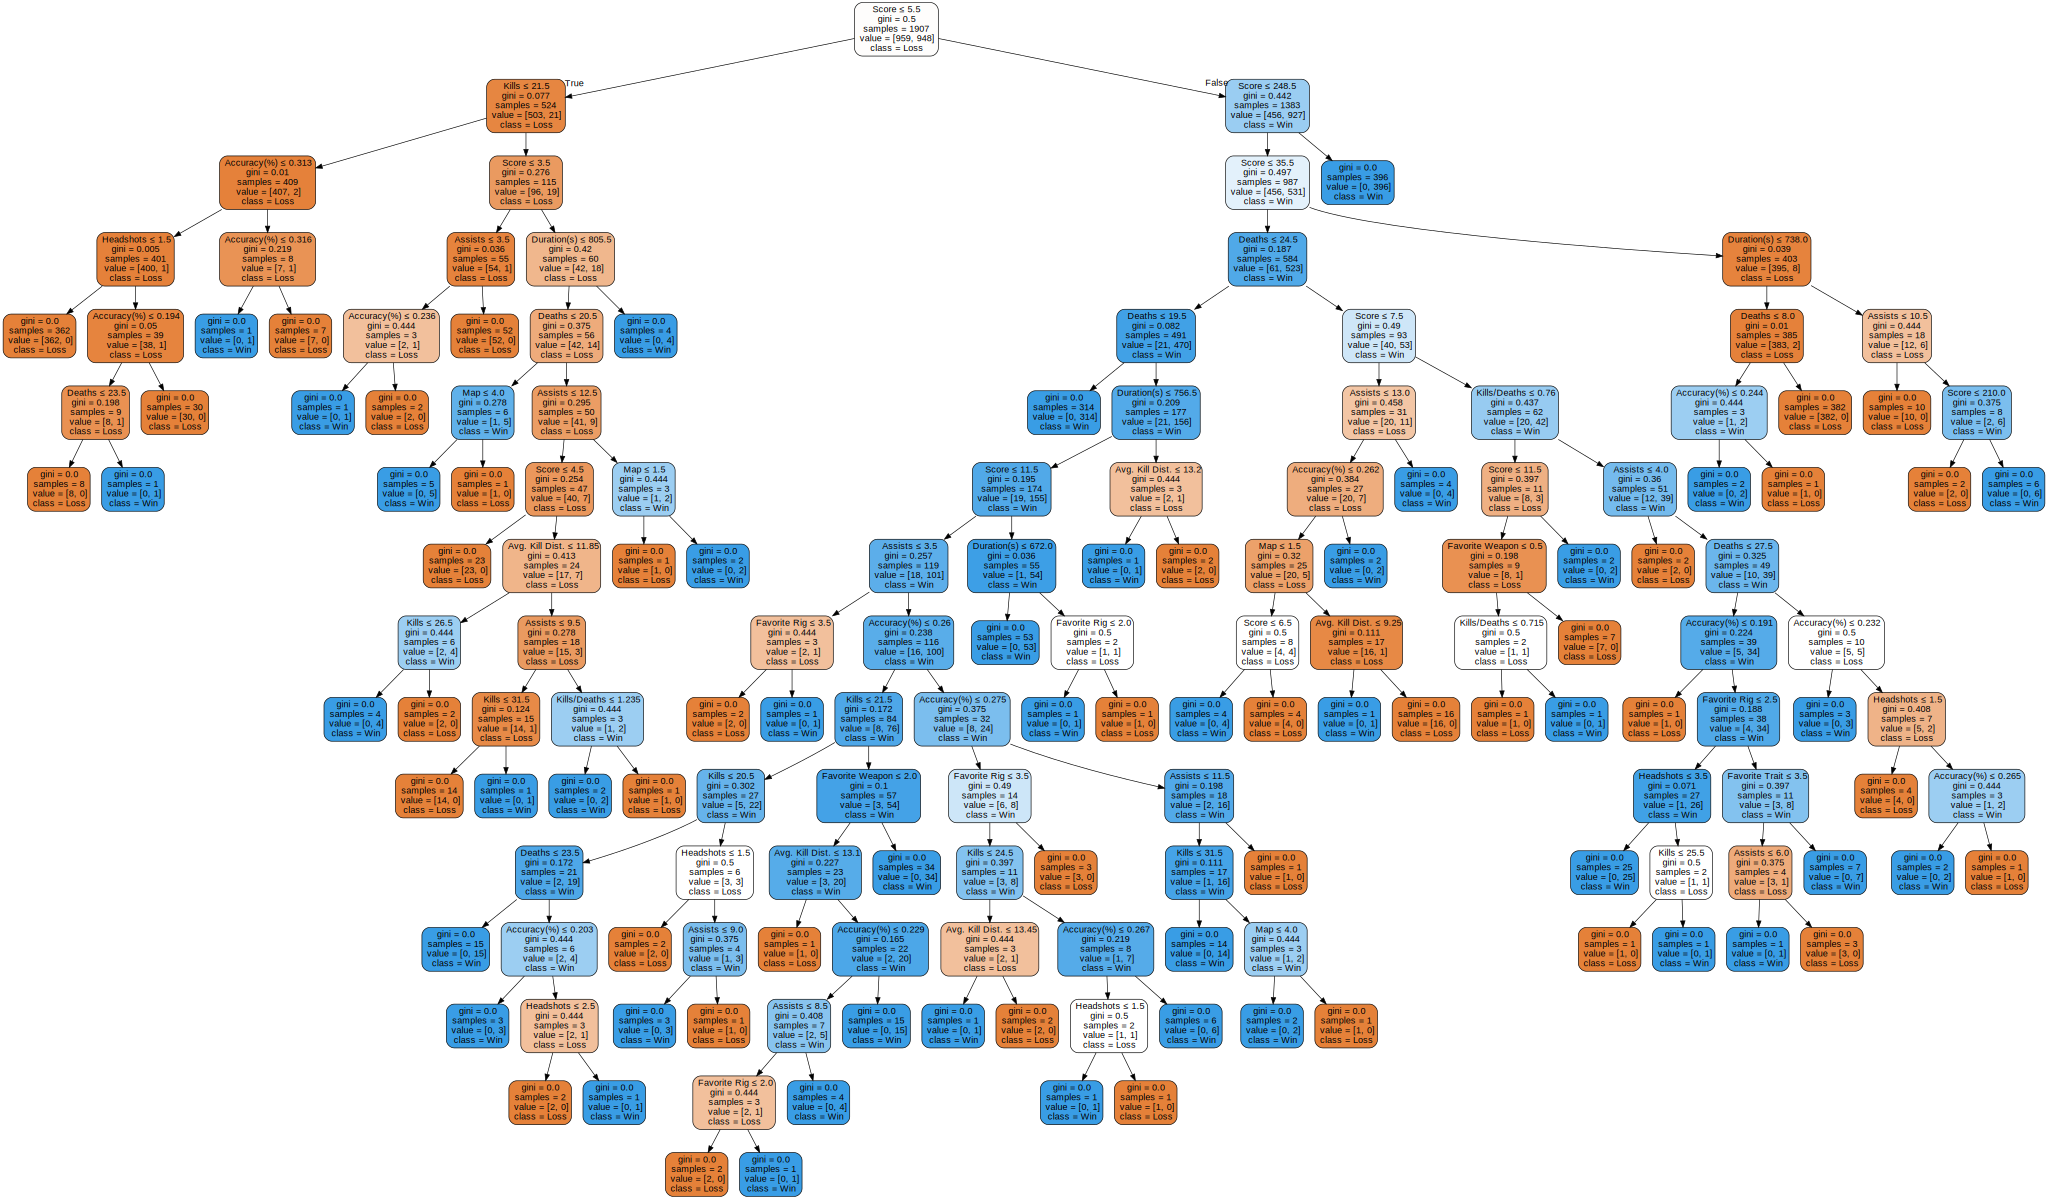

In [10]:
import graphviz 
#dot_data = tree.export_graphviz(clf, out_file=None) 
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=feature_names,  
                         class_names=class_name,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data) 
graph.render("CallOfDuty-DecisionTree") 
graph

## Random Forests

In [11]:
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred)

In [12]:
acc

0.9454926624737946

## Support Vector Machine

In [13]:
clf = svm.SVC()
clf = clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred)

In [14]:
acc

0.8176100628930818

## Logistic Regression

In [15]:
clf = LogisticRegression(random_state=123)
clf = clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred)

In [16]:
acc

0.8469601677148847

## Linear Regression

In [17]:
import sklearn as sk
import pandas as pd
import numpy as np
import re
from matplotlib import pyplot as plt

from sklearn import linear_model as lm
from sklearn import cross_validation as cv

data=pd.read_csv('GameData_29April.csv')

t_data=data

feature_list=[
    'Duration(s)',
    'Mode',
    'Map',
    'Kills',
    'Deaths',
    'Kills/Death',
    'Assists',
    'Headshots',
    'Accuracy(%)',
    'Avg. Kill Dist.(m)',
    'Favorite Weapon',
    'Favorite Rig',
    'Favorite Trait',
    #'Win/Loss',
    'Score']

c:\users\ashish\appdata\local\programs\python\python35\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [18]:
t_data.head()

,Duration(s),Mode,Map,Kills,Deaths,Kills/Death,Assists,Headshots,Accuracy(%),Avg. Kill Dist.(m),Favorite Weapon,Favorite Rig,Favorite Trait,Win/Loss,Score
0,480,0,0,12,19,0.63,5,1,0.175,23.1,0,0,0,0,106
1,480,0,0,19,20,0.95,5,0,0.212,24.1,0,1,1,0,106
2,480,0,0,12,23,0.52,6,2,0.140,14.0,1,2,2,0,106
3,480,0,0,15,17,0.88,6,2,0.187,17.6,1,3,3,0,106
4,480,0,0,18,15,1.20,9,0,0.170,20.6,0,0,0,1,250


In [19]:
t_data=t_data[feature_list]
t_data=t_data.fillna(t_data.mean())
X=t_data.drop('Score', axis=1)
Y=t_data['Score']
X_train, X_test, Y_train, Y_test=cv.train_test_split(X,Y,test_size=0.20, random_state=3)

In [20]:
X_train.head()

,Duration(s),Mode,Map,Kills,Deaths,Kills/Death,Assists,Headshots,Accuracy(%),Avg. Kill Dist.(m),Favorite Weapon,Favorite Rig,Favorite Trait
1582,643,0,0,26,18,1.44,14,1,0.285,18.8,0,0,0
246,540,0,0,24,22,1.09,2,4,0.240,24.0,0,2,2
1048,620,0,4,26,17,1.53,13,6,0.210,16.5,1,2,2
319,848,1,1,10,6,1.67,2,0,0.190,9.3,3,1,1
876,625,2,2,33,25,1.32,10,2,0.281,13.4,3,3,3


In [21]:
X_test.head()

,Duration(s),Mode,Map,Kills,Deaths,Kills/Death,Assists,Headshots,Accuracy(%),Avg. Kill Dist.(m),Favorite Weapon,Favorite Rig,Favorite Trait
1213,625,2,6,17,21,0.81,11,1,0.217,11.4,1,0,0
2376,625,2,6,20,23,0.87,9,1,0.204,11.9,3,4,4
1585,579,0,0,17,17,1.00,13,0,0.171,14.7,1,2,2
1561,626,2,2,17,27,0.63,11,2,0.204,14.4,3,4,4
414,643,0,0,27,23,1.17,2,4,0.240,18.0,0,0,0


In [22]:
Y_train.head()

1582    250
246     151
1048    250
319       6
876       9
Name: Score, dtype: int64

In [23]:
Y_test.head()

1213      5
2376      7
1585    250
1561      4
414     220
Name: Score, dtype: int64

In [24]:
regresserL=lm.LinearRegression(n_jobs=3,fit_intercept=True, normalize=True)
regresserR=lm.Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None ,normalize=True, random_state=2, solver='auto', tol=0.0001)
regresserTS=lm.TheilSenRegressor(fit_intercept=True, copy_X=True, max_subpopulation=5000.0, n_subsamples=1000, max_iter=3000, tol=0.001, random_state=1, n_jobs=3, verbose=True)

regresserL.fit(X=X_train,y=Y_train)
regresserR.fit(X=X_train,y=Y_train)
regresserTS.fit(X=X_train,y=Y_train)


Breakdown point: 0.0003299211141422065
Number of samples: 1907
Tolerable outliers: 0
Number of subpopulations: 5000


[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    1.6s finished


TheilSenRegressor(copy_X=True, fit_intercept=True, max_iter=3000,
         max_subpopulation=5000, n_jobs=3, n_subsamples=1000,
         random_state=1, tol=0.001, verbose=True)

In [25]:
#Error on Training Dataset
prediction=regresserL.predict(X_train)
sme=np.mean((np.array(Y_train)-prediction)**2)
print ('Linear: squared mean error: ',sme)
print ('Linear: root mean square error: ', np.sqrt(sme))

prediction=regresserR.predict(X_train)
sme=np.mean((np.array(Y_train)-prediction)**2)
print ('Ridge: squared mean error: ',sme)
print ('Ridge: root mean square error: ', np.sqrt(sme))

prediction=regresserTS.predict(X_train)
sme=np.mean((np.array(Y_train)-prediction)**2)
print ('TS: squared mean error: ',sme)
print ('TS: root mean square error: ', np.sqrt(sme))


Linear: squared mean error:  1129.526225867251
Linear: root mean square error:  33.6084249239272
Ridge: squared mean error:  1130.5574006085265
Ridge: root mean square error:  33.623762439806264
TS: squared mean error:  1129.0030265044777
TS: root mean square error:  33.600640269263884


In [26]:
#Error on Test Dataset
predictionL=regresserL.predict(X_test)
sme=np.mean((np.array(Y_test)-predictionL)**2)
print ('Linear: squared mean error: ',sme)
print ('Linear: root mean square error: ', np.sqrt(sme))

predictionR=regresserR.predict(X_test)
sme=np.mean((np.array(Y_test)-predictionR)**2)
print ('Ridge: squared mean error: ',sme)
print ('Ridge: root mean square error: ', np.sqrt(sme))

predictionTS=regresserTS.predict(X_test)
sme=np.mean((np.array(Y_test)-predictionTS)**2)
print ('TS: squared mean error: ',sme)
print ('TS: root mean square error: ', np.sqrt(sme))


Linear: squared mean error:  1010.5028029751061
Linear: root mean square error:  31.788406738543944
Ridge: squared mean error:  1004.837196617305
Ridge: root mean square error:  31.699167128132956
TS: squared mean error:  1008.1647630624904
TS: root mean square error:  31.75161040108817


In [27]:
regresserL.predict(X_test[0:100])

array([-19.01168852,  -7.87093603, 213.62906397, -13.62093603,
       206.1133407 ,  40.46844254, -15.12093603,  30.37906397,
       214.46205606,  29.19156397,  10.62906397,  23.00406397,
        -3.12093603, -10.48104236,  19.05392553, 201.19156397,
       208.62906397, 180.12906397, -19.13593647, 203.00406397,
       259.25406397, 235.50406397, 226.37906397,  -7.66253638,
       192.32927569, 200.12906397, -29.87093603,   9.87906397,
       185.69156397,   8.51787038, -11.12093603,  -5.62093603,
        11.4898714 ,   2.37589672,  24.88234635, 202.37906397,
        -0.49593603, 219.41282607,  -5.37093603,  10.12906397,
        22.62906397, 191.59172605,  13.19156397, 219.75406397,
         1.12906397,   9.87906397,  10.37906397,  -1.12093603,
       -21.39251221, 197.12906397, 271.08671705,   8.31656397,
         5.50406397, 186.79777728,   0.37906397,   4.57105516,
         3.37906397,  16.75406397, 215.37906397, -13.47753806,
        15.80762997,  14.12906397,  12.19156397, 224.44

In [28]:
aa = Y_test[0:10]
for i in aa:
    print(i)

5
7
250
4
220
7
11
2
250
1


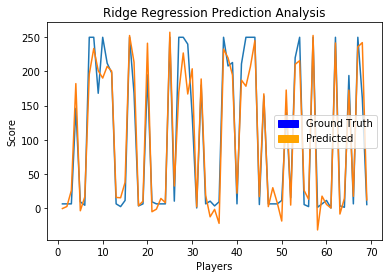

In [29]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

x = list(range(1,70))
plt.plot(x,Y_test[290:359])
plt.plot(x,regresserR.predict(X_test[290:359]))

plt.xlabel('Players')
plt.ylabel('Score')
plt.title('Ridge Regression Prediction Analysis')
blue_patch = mpatches.Patch(color='blue', label='Ground Truth')  
orange_patch = mpatches.Patch(color='orange', label='Predicted')
plt.legend(handles=[blue_patch,orange_patch])
plt.show
plt.savefig('Ridge.png')

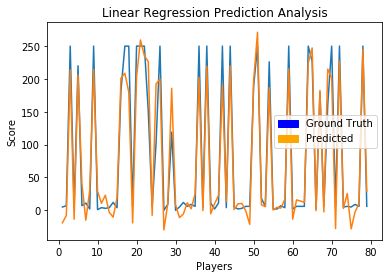

In [30]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

x = list(range(1,80))
plt.plot(x,Y_test[0:79])
plt.plot(x,regresserL.predict(X_test[0:79]))

plt.xlabel('Players')
plt.ylabel('Score')
plt.title('Linear Regression Prediction Analysis')
blue_patch = mpatches.Patch(color='blue', label='Ground Truth')
orange_patch = mpatches.Patch(color='orange', label='Predicted')
plt.legend(handles=[blue_patch,orange_patch])
plt.show
plt.savefig('Linear.png')

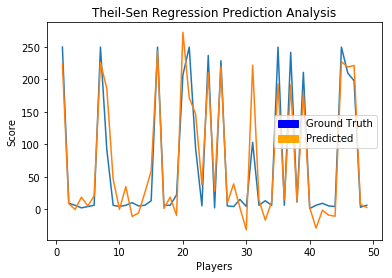

In [31]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

x = list(range(1,50))
plt.plot(x,Y_test[400:449])
plt.plot(x,regresserTS.predict(X_test[400:449]))

plt.xlabel('Players')
plt.ylabel('Score')
plt.title('Theil-Sen Regression Prediction Analysis')
blue_patch = mpatches.Patch(color='blue', label='Ground Truth')
orange_patch = mpatches.Patch(color='orange', label='Predicted')
plt.legend(handles=[blue_patch,orange_patch])
plt.show
plt.savefig('TS.png')

In [32]:
print ('Linear: ',regresserL.score(X=X_test, y=Y_test))
print ('Ridge: ',regresserR.score(X=X_test, y=Y_test))
print ('TS: ',regresserTS.score(X=X_test, y=Y_test))

Linear:  0.9100345510773172
Ridge:  0.9105389621664286
TS:  0.9102427076600783


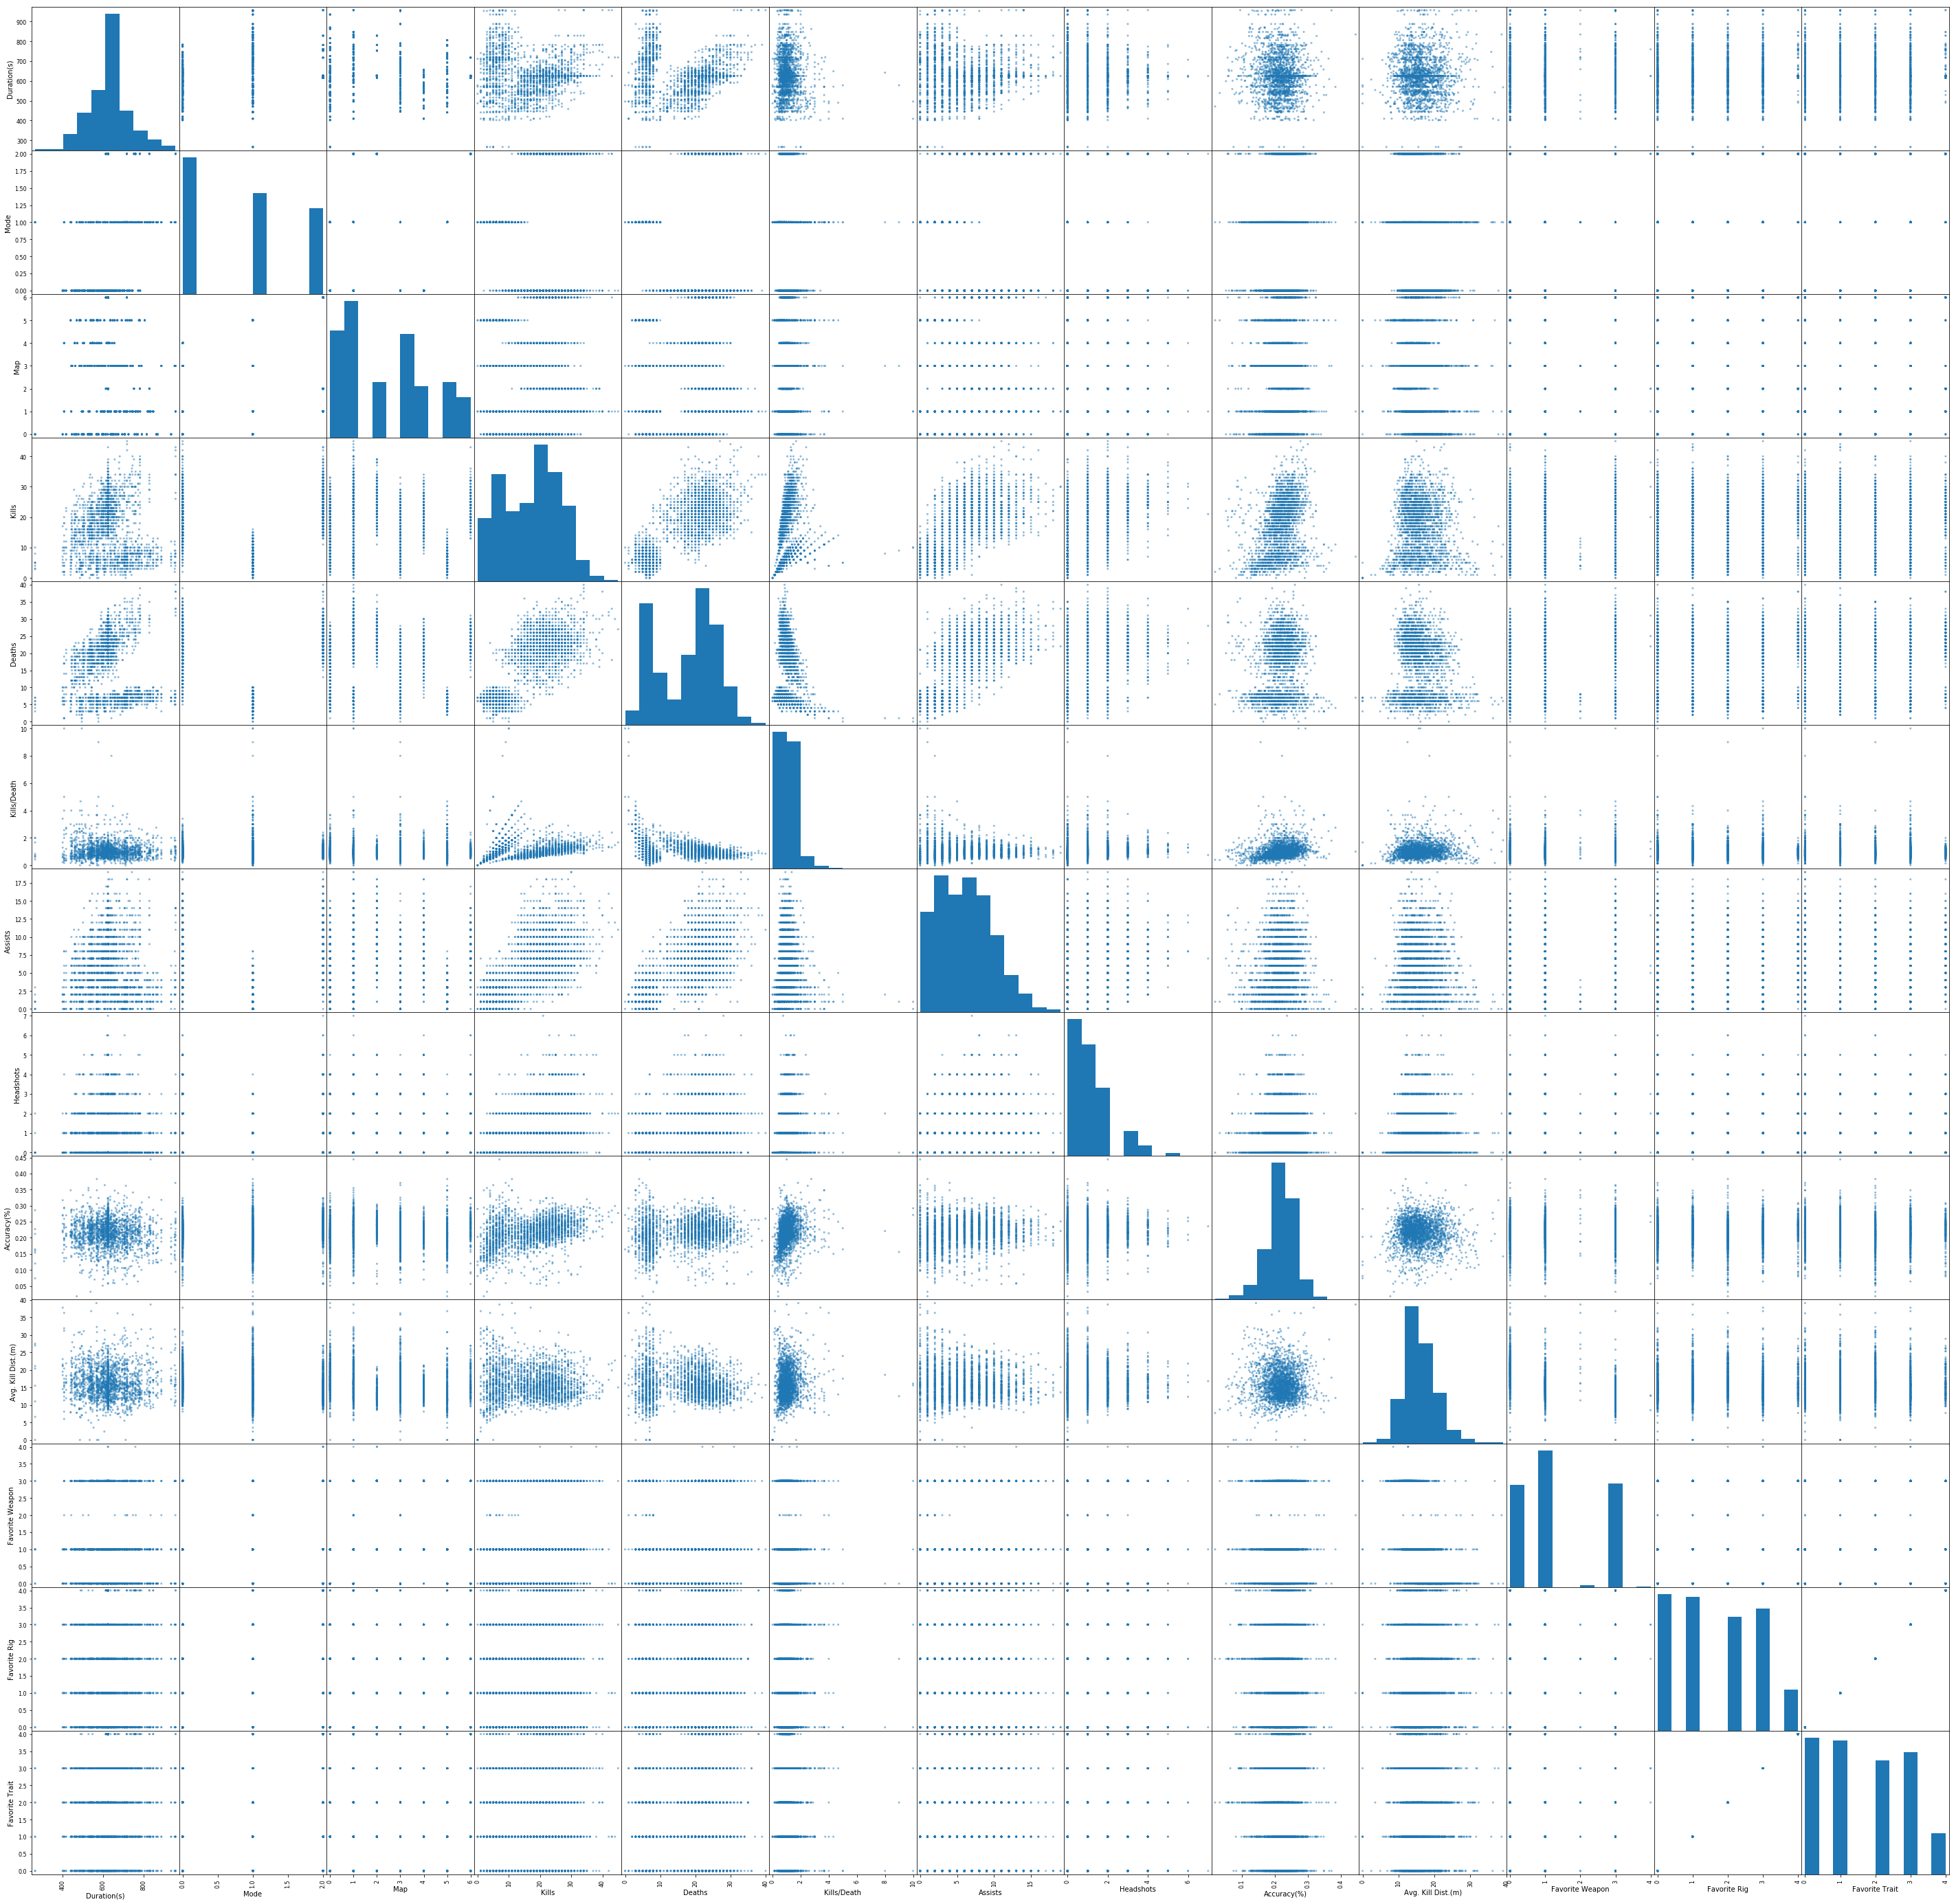

In [33]:
pd.plotting.scatter_matrix(t_data[[
    'Duration(s)',
    'Mode',
    'Map',
    'Kills',
    'Deaths',
    'Kills/Death',
    'Assists',
    'Headshots',
    'Accuracy(%)',
    'Avg. Kill Dist.(m)',
    'Favorite Weapon',
    'Favorite Rig',
    'Favorite Trait'
 ]],figsize=(50,50))
plt.show()
plt.savefig('correlation.png')

In [34]:
# Ridge Regression Coefficients
regresserR.coef_

array([-6.03665362e-02, -1.09058110e+02, -5.19366343e-02,  4.04161777e+00,
        7.92436749e-02, -3.63941012e+00,  3.70104408e+00, -1.18023329e-01,
       -1.25950890e+01,  8.45598119e-02,  2.10318374e-01,  7.57536315e-01,
        7.57536315e-01])

In [35]:
# Linear Regression Coefficients
regresserTS.coef_

array([-5.86108275e-02, -1.10400961e+02,  6.83980002e-02,  4.23404094e+00,
       -7.97657879e-02, -4.66040477e+00,  3.70584137e+00, -4.00404584e-01,
       -1.45902259e+01,  7.29908605e-02,  3.57471177e-01,  8.04380801e-01,
        8.04380801e-01])

In [36]:
# Thiel-Sen Regression Coefficients
regresserL.coef_

array([-5.85061734e-02, -1.10322002e+02,  1.76020707e-01,  4.25464025e+00,
       -7.30348261e-02, -4.76676555e+00,  3.62087338e+00, -4.04560170e-01,
       -1.31132342e+01,  5.60581278e-02,  3.60874256e-01,  4.67924087e+14,
       -4.67924087e+14])

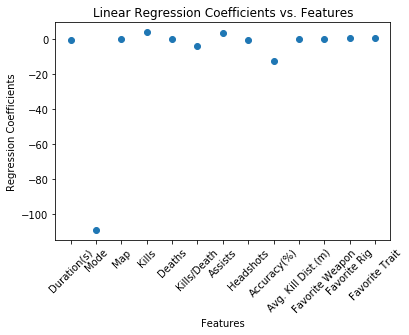

In [37]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

x = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13])
y = np.array([-6.03665362e-02, -1.09058110e+02, -5.19366343e-02,  4.04161777e+00,
        7.92436749e-02, -3.63941012e+00,  3.70104408e+00, -1.18023329e-01,
       -1.25950890e+01,  8.45598119e-02,  2.10318374e-01,  7.57536315e-01,
        7.57536315e-01])
a = np.array([0.76989, 0.77013, 0.77534])
my_xticks = [    
    'Duration(s)',
    'Mode',
    'Map',
    'Kills',
    'Deaths',
    'Kills/Death',
    'Assists',
    'Headshots',
    'Accuracy(%)',
    'Avg. Kill Dist.(m)',
    'Favorite Weapon',
    'Favorite Rig',
    'Favorite Trait']

plt.xticks(x, my_xticks,rotation=45)
plt.plot(x, y,'o')
plt.xlabel('Features')
plt.ylabel('Regression Coefficients')
plt.title('Linear Regression Coefficients vs. Features')
plt.show()
plt.savefig('Regression Coefficients vs Features.png')